In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load and read the Dataset**

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#**Null Value Check**

In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#**Data Type Check**

In [5]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
# 1. Clean the 'TotalCharges' column to ensure it's numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


<ipython-input-6-1aa9f1d43a94>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


#**Statistical Summary**

In [7]:
# 2. Locational Statistics (Central Tendency)
# Mean, Median, and Mode for Numerical Columns
mean_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
median_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].median()
mode_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].mode().iloc[0]

# Display results
print("Locational Statistics:")
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Locational Statistics:
Mean:
 tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

Median:
 tenure              29.00
MonthlyCharges      70.35
TotalCharges      1400.55
dtype: float64

Mode:
 tenure             1.00
MonthlyCharges    20.05
TotalCharges      20.20
Name: 0, dtype: float64


In [8]:
# 3. Variational Statistics (Dispersion)
# Standard Deviation and Variance for Numerical Columns
std_dev_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].std()
variance_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].var()
range_values = df[['tenure', 'MonthlyCharges', 'TotalCharges']].max() - df[['tenure', 'MonthlyCharges', 'TotalCharges']].min()

# Display results
print("\nVariational Statistics:")
print("Standard Deviation:\n", std_dev_values)
print("\nVariance:\n", variance_values)
print("\nRange:\n", range_values)


Variational Statistics:
Standard Deviation:
 tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2265.000258
dtype: float64

Variance:
 tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.130226e+06
dtype: float64

Range:
 tenure              72.0
MonthlyCharges     100.5
TotalCharges      8666.0
dtype: float64


# **Visualisation Chart**

# **Question 1: What is the distribution of customer tenure?**

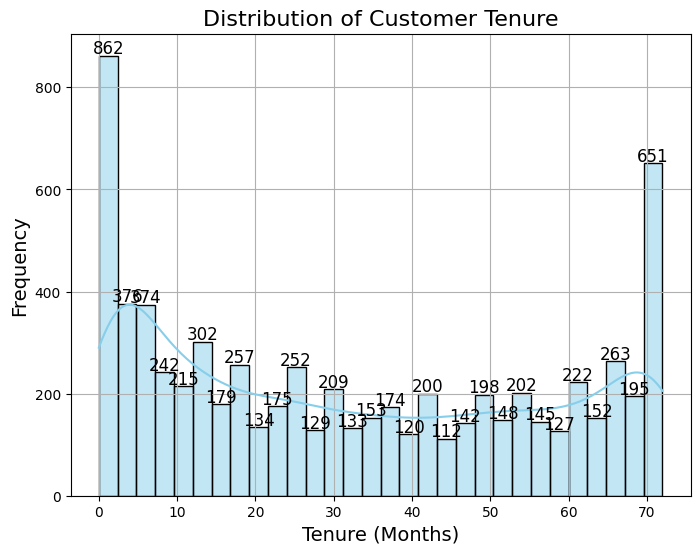

In [9]:
# Distribution of customer tenure with values on the chart
plt.figure(figsize=(8,6))
ax = sns.histplot(df['tenure'], kde=True, color='skyblue', bins=30)

# Add count values on top of each bin
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Distribution of Customer Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


# **Question 2: What is the distribution of customers who have churned versus those who have not?**

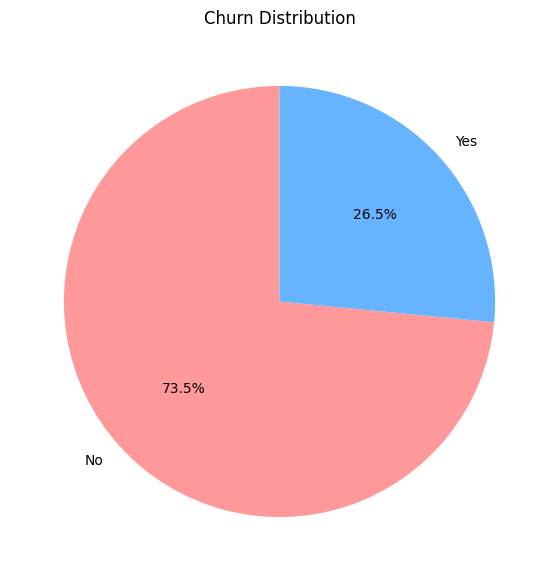

In [10]:
# 1. Churn Distribution (Pie Chart)
plt.figure(figsize=(7,7))
churn_counts = df['Churn'].value_counts()
churn_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()

# **Question 3: What is the gender distribution among customers?**

<ipython-input-11-adf5d7de23c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='gender', palette='Set2')


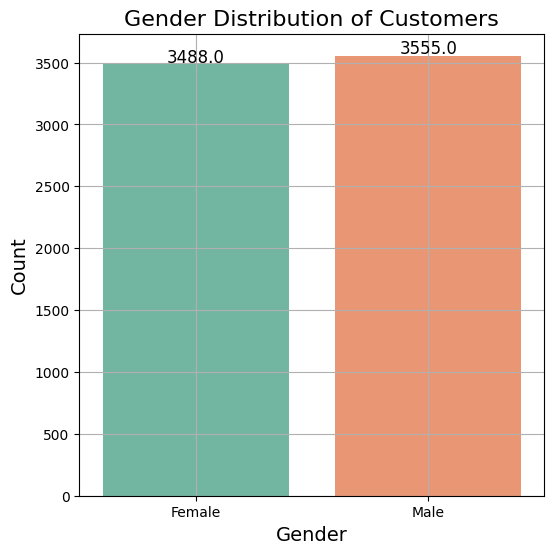

In [11]:
# Gender distribution with values on the chart
plt.figure(figsize=(6,6))
ax = sns.countplot(data=df, x='gender', palette='Set2')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

# Titles and labels
plt.title('Gender Distribution of Customers', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()


# **Question 4: How does the average monthly charge differ by contract type?**

<ipython-input-12-0497f4f6bb67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Contract', y='MonthlyCharges', palette='Set1')


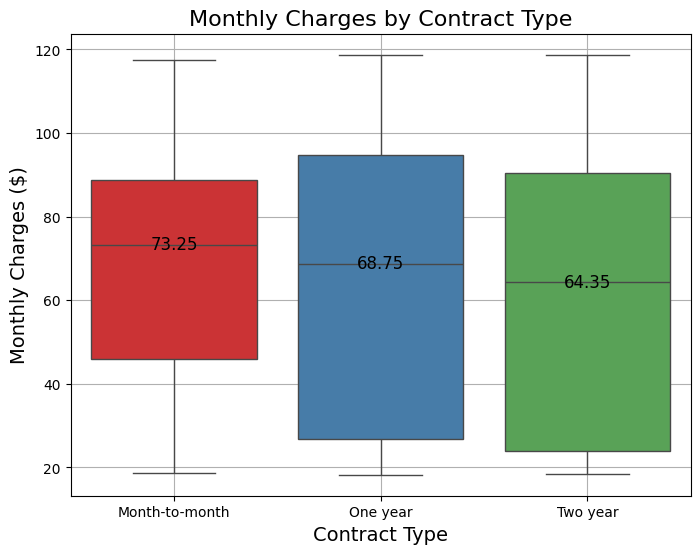

In [12]:
# Monthly charges by contract type with median values
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=df, x='Contract', y='MonthlyCharges', palette='Set1')

# Add median value on top of each box
for i, median in enumerate(df.groupby('Contract')['MonthlyCharges'].median()):
    ax.text(i, median, f'{median:.2f}', horizontalalignment='center', fontsize=12, color='black', verticalalignment='center')

# Titles and labels
plt.title('Monthly Charges by Contract Type', fontsize=16)
plt.xlabel('Contract Type', fontsize=14)
plt.ylabel('Monthly Charges ($)', fontsize=14)
plt.grid(True)
plt.show()


# **Question 5: What is the correlation between numerical features?**

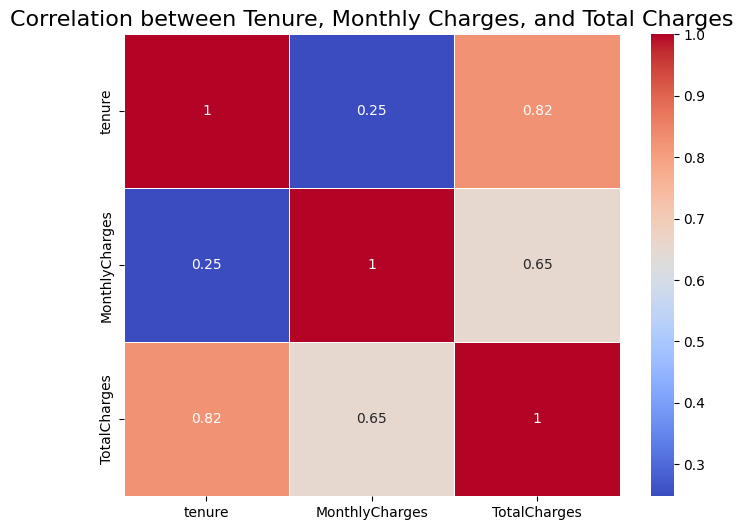

In [13]:
# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Tenure, Monthly Charges, and Total Charges', fontsize=16)
plt.show()

## **Classification Model**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report


In [23]:
# Drop 'customerID' as it is not a useful feature for model training
X = df.drop(['customerID', 'Churn'], axis=1)

# Encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

# Target variable remains the same
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Churn' to numeric (1 for Yes, 0 for No)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)


In [25]:
# Train the models
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [26]:
# Evaluate the models
log_reg_pred = log_reg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Print accuracy, recall, and F1 score along with classification report
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred):.4f}")
print(classification_report(y_test, log_reg_pred))

print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.4f}")
print(classification_report(y_test, dt_pred))

print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(classification_report(y_test, rf_pred))

Logistic Regression Evaluation:
Accuracy: 0.8211
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Decision Tree Evaluation:
Accuracy: 0.7097
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1036
           1       0.45      0.45      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409

Random Forest Evaluation:
Accuracy: 0.7921
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79    

<ipython-input-34-586d7d0cdf99>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='viridis')


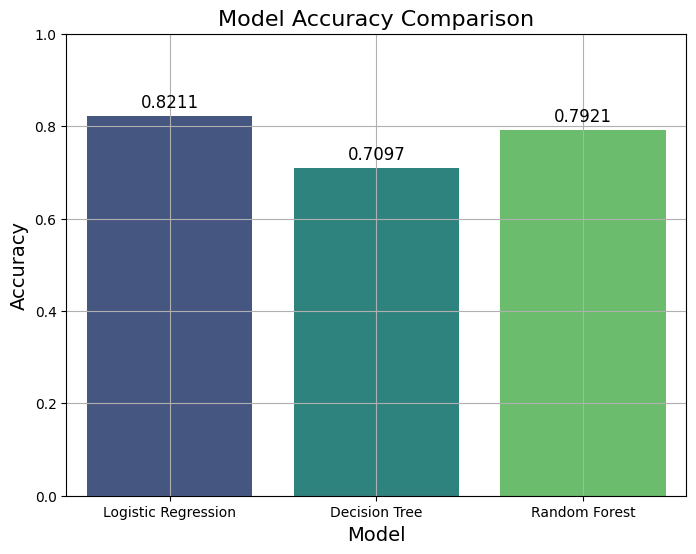

The best model is Logistic Regression with an accuracy of 0.8211.


In [34]:
# Evaluation results for accuracy
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [0.8211, 0.7097, 0.7921]

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy, palette='viridis')

# Add accuracy values on top of the bars
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 for better visibility
plt.grid(True)

# Show the plot
plt.show()

# Print the best model based on accuracy
best_model_index = accuracy.index(max(accuracy))
best_model = models[best_model_index]
best_accuracy = accuracy[best_model_index]

# Print the best model and its accuracy
print(f"The best model is {best_model} with an accuracy of {best_accuracy:.4f}.")

# **Regression Model**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

# Train the models
log_reg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predict with the models
log_reg_pred = log_reg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate and print evaluation metrics (for regression tasks)
def print_regression_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

# Print metrics for each model
print_regression_metrics("Logistic Regression", y_test, log_reg_pred)
print_regression_metrics("Decision Tree Regressor", y_test, dt_pred)
print_regression_metrics("Random Forest Regressor", y_test, rf_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - MSE: 0.1789, R2 Score: 0.0812
Decision Tree Regressor - MSE: 0.2950, R2 Score: -0.5154
Random Forest Regressor - MSE: 0.1448, R2 Score: 0.2560


In [36]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
log_reg_mse = mean_squared_error(y_test, log_reg_predictions)
log_reg_r2 = r2_score(y_test, log_reg_predictions)
# Print Results
print(f"Logistic Regression MSE: {log_reg_mse:.4f}, R²: {log_reg_r2:.4f}")

Logistic Regression MSE: 0.1789, R²: 0.0812


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# 2. Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
dt_predictions = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree Regression MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}")

Decision Tree Regression MSE: 0.2950, R²: -0.5154


In [38]:
# 3. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regression MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")

Random Forest Regression MSE: 0.1448, R²: 0.2560


<ipython-input-40-c64bd7a22e76>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


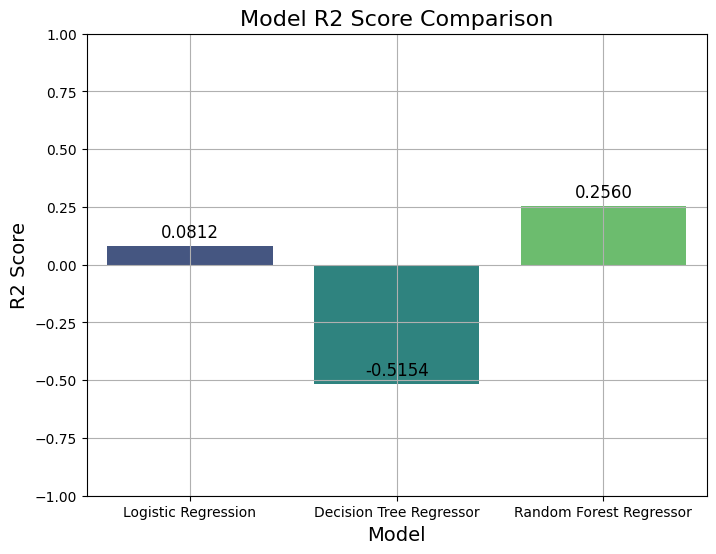

The best model is Random Forest Regressor with an R2 score of 0.2560.


In [40]:
# Evaluation results for models' R2 score
models = ['Logistic Regression', 'Decision Tree Regressor', 'Random Forest Regressor']
r2_scores = [0.0812, -0.5154, 0.2560]
mse_values = [0.1789, 0.2950, 0.1448]

# Create the bar plot for R2 scores
plt.figure(figsize=(8, 6))

# Bar plot for R2 scores
sns.barplot(x=models, y=r2_scores, palette='viridis')

# Add R2 score values on top of the bars
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

# Add titles and labels
plt.title('Model R2 Score Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.ylim(-1, 1)  # Set y-axis range from -1 to 1 for better visibility
plt.grid(True)

# Show the plot
plt.show()

# Print the best model based on R2 score
best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]
best_r2 = r2_scores[best_model_index]

# Print the best model and its R2 score
print(f"The best model is {best_model} with an R2 score of {best_r2:.4f}.")

# **Clustering Model**

In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [42]:
# Encode categorical columns into numeric
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('customerID', errors='ignore')  # Exclude 'customerID'

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Select features for clustering (excluding 'customerID' and 'Churn')
features = df.drop(['customerID', 'Churn'], axis=1, errors='ignore')

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

# 2. Hierarchical Clustering (Agglomerative Clustering)
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_features)
hierarchical_silhouette = silhouette_score(scaled_features, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}")

# Determine which method has the highest score
if kmeans_silhouette > hierarchical_silhouette:
    print(f"Highest Score: K-Means ({kmeans_silhouette:.4f})")
else:
    print(f"Highest Score: Hierarchical Clustering ({hierarchical_silhouette:.4f})")

K-Means Silhouette Score: 0.1573
Hierarchical Clustering Silhouette Score: 0.1441
Highest Score: K-Means (0.1573)


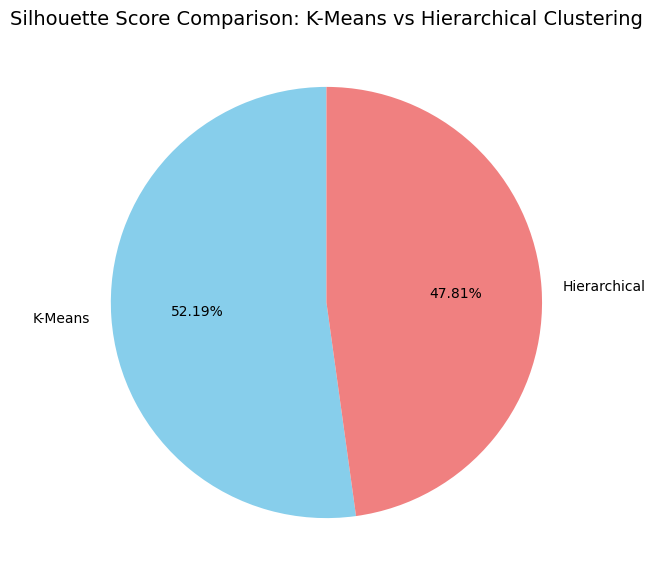

In [43]:
# Data for the pie chart
models = ['K-Means', 'Hierarchical']
scores = [kmeans_silhouette, hierarchical_silhouette]

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    scores,
    labels=models,
    autopct='%1.2f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title('Silhouette Score Comparison: K-Means vs Hierarchical Clustering', fontsize=14)
plt.show()